In [1]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
import seaborn as sns
import sklearn.neighbors
import matplotlib.pyplot as plt
%matplotlib inline

import Levenshtein

import sys
sys.path.append('..')

from lib import *

In [2]:
df_t = load_iedb_tcellepitopes(human_only=True, positive_only=True)

In [3]:
k = 9
counter9 = count_kmers_proteome(human, k, clean=True)

In [4]:
human9 = set(counter9)

In [5]:
# no human epitopes
mask = ~df_t['Epitope', 'Parent Species'].str.contains('Homo sapiens', na=False)
# no epitopes of unknown provenance
mask &= ~df_t['Epitope', 'Parent Species'].isna()
# only epitopes of length 9
mask &= df_t['Epitope', 'Description'].apply(len)==9
# only infectious disease epitopes
mask &= df_t['1st in vivo Process', 'Process Type'] == 'Occurrence of infectious disease'
d = df_t[mask]

In [6]:
#d['1st in vivo Process', 'Process Type'].value_counts()

In [7]:
d0 = d[d['Epitope', 'Description'].apply(lambda x: x in human9)]
d0.head()

Reference  \
                                Assay IRI   
79301   http://www.iedb.org/assay/1472651   
116420  http://www.iedb.org/assay/1664514   
279349  http://www.iedb.org/assay/2642070   
279351  http://www.iedb.org/assay/2642072   
338722  http://www.iedb.org/assay/3925457   

                                                                       \
                                Reference IRI        Type   PubMed ID   
79301   http://www.iedb.org/reference/1006541  Literature   7520213.0   
116420  http://www.iedb.org/reference/1007092  Literature   1281825.0   
279349  http://www.iedb.org/reference/1029824  Literature  26771180.0   
279351  http://www.iedb.org/reference/1029824  Literature  26771180.0   
338722  http://www.iedb.org/reference/1033211  Literature  29709038.0   

                                                           \
                                                  Authors   
79301          S S Witkin; J Jeremias; M Toth; W J Ledger   
116420  J M Davies; S Sonoda; S Yashiki; M Osame; P R ...   
279349  Ikbel Naouar; Thouraya Boussoffara; Mehdi Chen...   
279351  Ikbel Naouar; Thouraya Boussoffara; Mehdi Chen...   
338722  Nicolas Jouand; C&eacute;line Bressollette-Bod...   

                                   \
                    Journal  Date   
79301   Am J Obstet Gynecol  1994   
116420       J Neuroimmunol  1992   
279349             PLoS One  2016   
279351             PLoS One  2016   
338722          PLoS Pathog  2018   

                                                                         \
                                                    Title Submission ID   
79301   Proliferative response to conserved epitopes o...           NaN   
116420  Mimicry between HTLV-I and myelin basic protei...           NaN   
279349  Prediction of T Cell Epitopes from Leishmania ...           NaN   
279351  Prediction of T Cell Epitopes from Leishmania ...           NaN   
338722  HCMV triggers frequent and persistent UL40-spe...           NaN   

                                   Epitope  ...            Assay Antigen  \
                               Epitope IRI  ... Non-peptidic Antigen IRI   
79301     http://www.iedb.org/epitope/5394  ...                      NaN   
116420  http://www.iedb.org/epitope/113416  ...                      NaN   
279349  http://www.iedb.org/epitope/492663  ...                      NaN   
279351  http://www.iedb.org/epitope/490102  ...                      NaN   
338722   http://www.iedb.org/epitope/95972  ...                      NaN   

                                                         \
                           Antigen Source Molecule Name   
79301                                              groE   
116420                             Myelin basic protein   
279349  putative proteasome regulatory ATPase subunit 2   
279351  putative proteasome regulatory ATPase subunit 2   
338722                       membrane glycoprotein UL40   

                                                           \
                              Antigen Source Molecule IRI   
79301      http://www.ncbi.nlm.nih.gov/protein/AAA23128.1   
116420   https://ontology.iedb.org/ontology/ONTIE_0002407   
279349  http://www.ncbi.nlm.nih.gov/protein/XP_0016818...   
279351  http://www.ncbi.nlm.nih.gov/protein/XP_0016818...   
338722                                                NaN   

                                                         \
                                    Protein Parent Name   
79301                                 60 kDa chaperonin   
116420                             Myelin basic protein   
279349  Putative proteasome regulatory ATPase subunit 2   
279351  Putative proteasome regulatory ATPase subunit 2   
338722                                              NaN   

                                                                        \
                           Protein Parent IRI    Antigen Organism Name   
79301   http://www.uniprot.org/uniprot/P0C0Z7    Chla

In [8]:
d0['Epitope', 'Parent Species'].unique()

array(['Chlamydia trachomatis', 'Cavia porcellus', 'Leishmania major',
       'Human betaherpesvirus 5'], dtype=object)

In [9]:
counter_to_df(counter9)

,seq,freq
0,MGAPLLSPG,1.762206e-07
1,GAPLLSPGW,1.762206e-07
2,APLLSPGWG,1.762206e-07
3,PLLSPGWGA,1.762206e-07
4,LLSPGWGAG,1.762206e-07
5,LSPGWGAGA,1.762206e-07
6,SPGWGAGAA,1.762206e-07
7,PGWGAGAAG,1.762206e-07
8,GWGAGAAGR,1.762206e-07
9,WGAGAAGRR,1.762206e-07


In [10]:
p = len(human9)/20**9
d0.shape[0], p*d.shape[0]

(8, 0.08341721531640625)

In [11]:
def dist1(x):
    for i in range(len(x)):
        for aa in aminoacids:
            if aa == x[i]:
                continue
            if x[:i]+aa+x[i+1:] in human9:
                return True
    return False
d1 = d[d['Epitope', 'Description'].apply(dist1)]

In [12]:
d1.shape[0], p*d.shape[0]*19*9

(106, 14.26434381910547)

In [13]:
d1['Epitope', 'Parent Species'].unique()

array(['Hepatitis B virus', 'Mycobacterium tuberculosis',
       'Borreliella burgdorferi', 'Hepacivirus C', 'Plasmodium vivax',
       'Plasmodium falciparum', 'Chlamydia trachomatis',
       'Human gammaherpesvirus 4', 'Human metapneumovirus',
       'Trypanosoma cruzi', 'Mycobacterium kansasii',
       'Human alphaherpesvirus 1', 'Alphapapillomavirus 9',
       'Mycobacterium leprae', 'Dengue virus', 'Leishmania major',
       'Human betaherpesvirus 5'], dtype=object)

# Analysis of flu epitopes

In [14]:
fluepis = df_t[df_t['Epitope', 'Parent Species'] == 'Influenza A virus']#['Epitope', 'Description'].unique()
fluepis.shape

(3024, 141)

In [15]:
fluepis['Epitope', 'Description'].unique().shape

(1266,)

(array([ 13., 114.,  58.,  27.,  14.,  65.,  31.,  86.,  53., 314., 234.,
        196.]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 <a list of 12 Patch objects>)

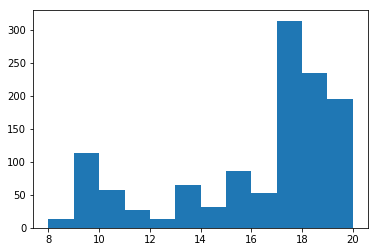

In [16]:
plt.hist([len(s) for s in fluepis['Epitope', 'Description'].unique()], bins=np.arange(8, 21))

In [18]:
nchunks = 100
btdist = BallTreeDist(human9, nchunks=nchunks)

In [19]:
fludists = [btdist.mindist(e) for e in fluepis[fluepis['Epitope', 'Description'].apply(len)==9]]

KeyError: 'Reference'

In [ ]:
proteomes = load_proteomes()


In [ ]:
df_flua = counter_to_df(count_kmers_proteome(datadir + proteomes.loc['InfluenzaA']['path'], 9), norm=True)
df_flua.head()

In [ ]:
distss = []
for i in range(3):
    peptides = np.random.choice(df_flua['seq'], size=len(fludists), replace=False, p=df_flua['freq'])
    dists = [btdist.mindist(e) for e in peptides]
    distss.append(dists)

In [ ]:
counts = np.bincount(fludists)
print(counts)
plt.plot(counts, 'o')
for d in [distss[0], distss[1], distss[2]]:
    counts = np.bincount(d)
    print(counts)
    plt.plot(counts, 'kx')

In [ ]:
def dist2(x):
    for i in range(len(x)):
        for j in range(i+1, len(x)):
            for aai in aminoacids:
                si = x[:i]+aai+x[i+1:]
                for aaj in aminoacids:
                    if (aai == x[i]) and (aaj == x[j]):
                        continue
                    if si[:j]+aaj+si[j+1:] in human9:
                        return True
    return False

In [ ]:
def dists_direct(df, ref):
    d0 = df[df['seq'].apply(lambda x: x in ref)].shape[0]/df['seq'].shape[0]
    d1 = df[df['seq'].apply(dist1)].shape[0]/df['seq'].shape[0]
    d2 = df[df['seq'].apply(dist2)].shape[0]/df['seq'].shape[0]
    return d0, d1, d2

In [ ]:
distsallflu = dists_direct(df_flua, human9)

In [ ]:
counts = np.bincount(fludists)
plt.plot(counts/np.sum(counts), 'o')
plt.plot(distsallflu, 'x')

N = sum(counter9.values())
print('%e'%N)
k = 9
K = 20**k

dists = np.arange(6)
Nc = lambda d: 19**dists * falling_factorial(k, dists+1)
cumulative = [0]
cumulative.extend(1-np.exp(-Nc(dists)*N/K))
plt.plot(dists, np.diff(cumulative), '+')
plt.ylim(0.0)

In [ ]:
hivepis = d[d['Epitope', 'Parent Species'] == 'Human immunodeficiency virus 1']['Epitope', 'Description'].unique()
hivepis.shape

In [ ]:
hivdists = [mindist_sklearn_chunked(e, bts) for e in hivepis]

In [ ]:
counts = np.bincount(hivdists)
print(counts)
plt.plot(counts, 'x')

In [ ]:
df_hiv1 = counter_to_df(count_kmers_proteome(datadir + proteomes.loc['HIV']['path'], 9), norm=True)
df_hiv1.head()

In [ ]:
distss_hiv = []
for i in range(3):
    peptides = np.random.choice(df_hiv1['seq'], size=len(hivdists), replace=False, p=df_hiv1['freq'])
    dists = [mindist_sklearn_chunked(e, bts) for e in peptides]
    distss_hiv.append(dists)

In [ ]:
counts = np.bincount(hivdists)
print(counts)
plt.plot(counts, 'o')
for d in distss_hiv:
    counts = np.bincount(d)
    print(counts)
    plt.plot(counts, 'kx')

In [ ]:
distsallhiv = dists_direct(df_hiv1, human9)

In [ ]:
counts = np.bincount(hivdists)
plt.plot(counts/np.sum(counts), 'o')
plt.plot(distsallhiv, 'x')
N = sum(counter9.values())
print('%e'%N)
k = 9
K = 20**k

dists = np.arange(6)
Nc = lambda d: 19**dists * falling_factorial(k, dists+1)
cumulative = [0]
cumulative.extend(1-np.exp(-Nc(dists)*N/K))
plt.plot(dists, np.diff(cumulative), '+')
plt.ylim(0.0)